In [1]:
!pip3 install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.1 MB/s 
     |████████████████████████████████| 6.6 MB 31.8 MB/s 
     |████████████████████████████████| 596 kB 44.9 MB/s 
     |████████████████████████████████| 101 kB 12.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchtext.data import get_tokenizer
from torch.utils.data.dataset import random_split
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split


## Loading the data

In [3]:
df = pd.read_csv('quora_duplicate_questions.tsv', sep = '\t')

## Removing Null records

In [4]:
df = df.dropna(how='any',axis=0) 

## Finding the token frequency

In [5]:

#que_df = df[["question1"]]
que_df = pd.concat((df['question1'], df['question2']),axis =0,ignore_index=True)
#que_df["question1"] = df[["question2"]]
que_df.columns = ['Questions']

In [6]:
que_df

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
583899                     What is the romantic novel ever?
583900        What are the best Indian TV series for youth?
583901    What hero from Overwatch do you think needs a ...
583902              Do some tall women prefer shorter guys?
583903    If someone puts a gun to your head and forces ...
Length: 583904, dtype: object

In [7]:
num_words = que_df.apply(lambda row: len(row.split(" ")))



AxesSubplot(0.125,0.125;0.775x0.755)


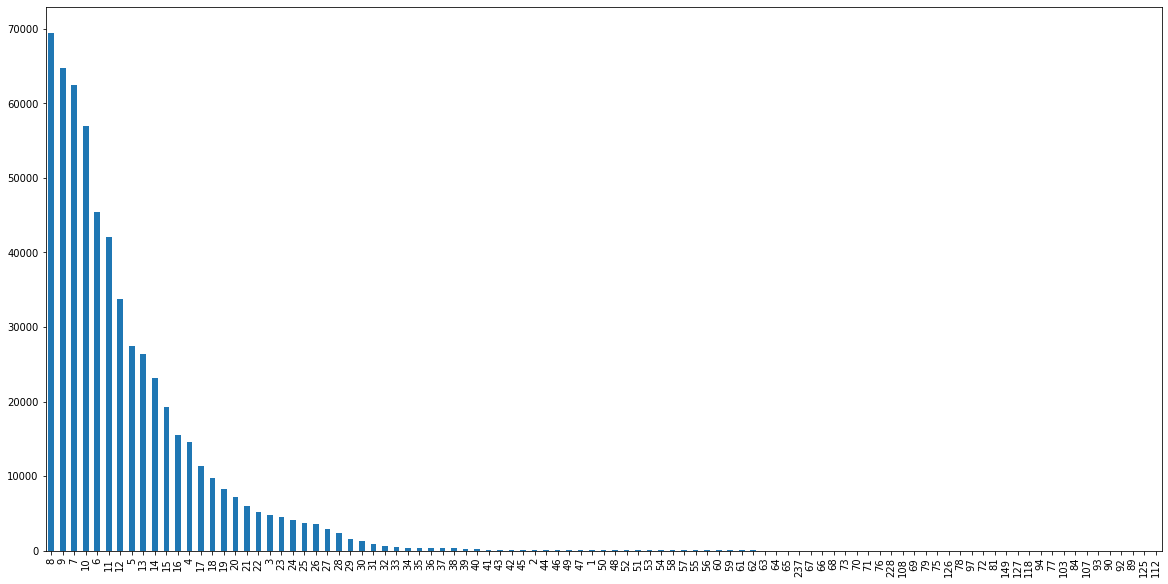

In [8]:
print(num_words.value_counts().plot(kind="bar", figsize = (20,10)))

In [9]:
class Preprocessing:
	
    def __init__(self):
		    self.data = 'quora_duplicate_questions.tsv'
		    self.max_len = 60
		    self.max_words = 6000
		    self.test_size = 0.2
		    self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
		
    def load_data(self):
		    df = pd.read_csv(self.data, sep ='\t')
		    df.drop(['id','qid1','qid2'], axis=1, inplace=True)
		    df = df.dropna()
		    X = df[['question1','question2']]
		    Y = df['is_duplicate']
		    #print(df)
		    #lens = [int(len(df)*0.8), int(len(df)*0.2)]
		    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X,Y, random_state = 123, test_size=0.2)

    def sequence_to_token(self):
		    #print(list(self.X_train['question1']))
		    question_1_train = self.tokenizer(list(self.X_train['question1']), padding='max_length', truncation=True, max_length=self.max_len)
		    question_2_train = self.tokenizer(list(self.X_train['question2']), padding='max_length', truncation=True, max_length= self.max_len)
		    question_1_test = self.tokenizer(list(self.X_test['question1']), padding='max_length', truncation=True, max_length=self.max_len)
		    question_2_test = self.tokenizer(list(self.X_test['question2']), padding='max_length', truncation=True, max_length= self.max_len)
		    return question_1_train['input_ids'] , question_2_train['input_ids'], question_1_test['input_ids'] , question_2_test['input_ids']

In [10]:
pro = Preprocessing()

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [11]:
pro.load_data()

In [30]:
pro.X_train

,question1,question2
270278,What are the factors affecting rates of us dol...,How can I get the cheapest flight from Brazil ...
381357,Do you have friends with benefits?,Should I do friends with benefits or not?
379776,What is the best résumé font?,What are some good fonts?
54070,How can I smartly cut myself?,Can someone who thinks about suicide for 7 yea...
46450,How do I see who is viewing my Instagram videos?,Can one tell who viewed my Instagram videos?
...,...,...
192477,What happens if a lightning strikes in the ocean?,What happens when lightning strikes the oceans...
17730,How can dogs understand human language?,Can dogs understand the human language?
28030,What's your favourite lotion?,What's your favourite skin lotion?
277871,How is SRCC's GBO programme?,"Which of these college is better for MBA, SRCC..."


In [12]:
question_1_train, question_2_train, question_1_test, question_2_test = pro.sequence_to_token()

In [13]:
len(question_1_train)

323429

In [14]:
len(question_1_test)

80858